# Pratica 5 - Modelos de Linguagem
Modelos de Linguagem envolvem a estimação de probabilidades condicionais de ocorrência de um termo dado um contexto. 
$$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2|t_1)P(t_3|t_1t_2)P(t_4|t_1t_2t_3)$$

In [7]:
import nltk
import string
from nltk.corpus import machado
from nltk.corpus import stopwords
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Modelo Unigrama  (bag of words)
 neste modelo, a ordem das palavras não importa. 
 $$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2)P(t_3)P(t_4)$$

In [31]:
swu = stopwords.words('portuguese') + list (string.punctuation)
wordgen = (word for word in machado.words() if word.lower() not in swu)
fd = nltk.FreqDist(wordgen)
fd.most_common(20)

[('\x97', 25386),
 ('é', 22286),
 ('--', 9643),
 ('...', 8180),
 ('disse', 6444),
 ('ser', 4831),
 ('casa', 4821),
 ('tempo', 4339),
 ('ainda', 4226),
 ('coisa', 3999),
 ('dia', 3959),
 ('olhos', 3936),
 ('tudo', 3879),
 ('lo', 3726),
 ('outro', 3652),
 ('nada', 3648),
 ('tão', 3592),
 ('outra', 3553),
 ('D', 3495),
 ('dois', 3494)]

In [32]:
x,y = zip(*fd.most_common(20))

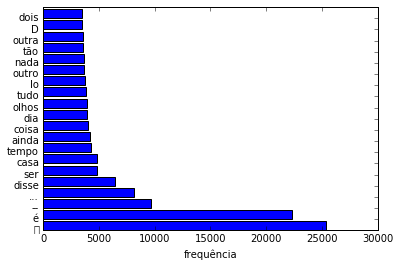

In [30]:
barh(bottom=range(len(x)), width=y);
ax = gca()
ax.set(yticks=range(len(x)),yticklabels=x);
xlabel('frequência');

### Bigramas
Uma alternativa ao modelo bag-of-words onde as probabilidades são independentes, é o modelo bigrama. onde calculamos a probabilidade de ocorrência de uma palavra condicionada à ocorrência da anterior.
$$P_{bi}(t_1t_2t_3t_4) = P(t_1)P(t_2|t_1)P(t_3|t_2)P(t_4|t_3)$$
nltk.ConditionalFreqDist é um estimador de probabilidades condicionais. Dada uma lista de bigramas, para cada palavra no vocabulário, ele calculará uma distribuição de frequências para a próxima palavra.

In [40]:
wordgen = (word for word in machado.words() )#if word.lower() not in swu)
machado_2gram = nltk.ConditionalFreqDist(nltk.bigrams(wordgen))

*conditions()* retorna as palavras para as quais temos distribuições condicionais construídas.

In [41]:
machado_2gram.conditions()

['berrei',
 'desfalecimento',
 'Cristandade',
 'imbecilidade',
 'régulièrement',
 'chocadeira',
 'Verdelet',
 'graúdas',
 'traria',
 'soez',
 'damas',
 'renuncia',
 'sobrepostos',
 'fecharem',
 'anteveder',
 'barra',
 'escasseia',
 'suserania',
 'festejamos',
 'fiquemos',
 'Sentam',
 'Maxwell',
 'Magoada',
 'rasto',
 'luxuosamente',
 'Perguntava',
 'campainha',
 'heliotrópada',
 'Bastava',
 'ponhas',
 'pesavam',
 'perdêssemos',
 'Cresceu',
 'papelório',
 'complemento',
 'terminando',
 'figurava',
 'abrigaram',
 'Benguela',
 'Convenci',
 'Áspera',
 'torneiros',
 'dons',
 'senadores',
 'Varreu',
 'trépassa',
 'Lemos',
 'sérénades',
 'Juntei',
 'vogais',
 'presumas',
 'Sacramento',
 'surpreender',
 '.°.',
 'ficá',
 'bélicas',
 'aniversária',
 'triunfantes',
 'Fazia',
 'surgiste',
 'convicção',
 'recosto',
 'Maria',
 'induz',
 'pessoas',
 'reprimiu',
 'allons',
 'munidos',
 'apreciava',
 'recupera',
 'silenciosos',
 'datam',
 'Au',
 'Pensemos',
 'course',
 'invejam',
 'atendiam',
 'Delicio

Podemos obter a contagem de palavras que se seguem à uma palavra específica.

In [43]:
machado_2gram['exercia']

FreqDist({'sobre': 4, 'o': 4, 'nela': 3, 'um': 3, 'a': 3, 'em': 2, 'desde': 2, 'no': 1, 'então': 1, 'com': 1, ...})

Ou podemos obter a Probabilidade por máxima verossimilhança:

In [45]:
machado_2gram_cp = nltk.ConditionalProbDist(machado_2gram, nltk.MLEProbDist)

In [50]:
cp = machado_2gram_cp['exercia']
cp.samples()

dict_keys(['sobre', 'no', 'então', 'com', 'em', 'realmente', 'interinamente', 'o', 'outra', 'nela', 'uma', 'um', '-', 'a', 'de', 'desde', 'esse', 'mais', 'aquele', 'nele', 'na', 'as'])

In [51]:
cp.prob('sobre')

0.1111111111111111

In [58]:
def gera_texto(palavra_inicial, cpd,numero=50):
    
    w = palavra_inicial
    texto = w
    for i in range(numero):
        w2 = cpd[w].generate()
        texto += ' ' + w2
        w = w2
    return texto

In [59]:
gera_texto('Cresceu',machado_2gram_cp)

'Cresceu porém Marques se alcanças a amava o leitor de encomenda . Nenhuma palavra que falava no abismo , não elege logo ao mesmo tempo esse conhecimento . -- Não faltes ... Tinha fome vivia sempre , bufando como possíveis . Saraiva o condão singular noite mal ; imperfeitos , têm'